In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [16]:
#libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
#Loading the dataset
df = pd.read_csv("wine.data.csv.txt", header=-1)

In [18]:
#Getting to know the data
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
#data setup
X = df.iloc[:, 1:]
y = df[1]

In [20]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [24]:
#PCA code
pca = PCA(n_components=2)
pca.fit(X_test_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
#Getting the variance scores and rounding them with the last 4 digits
pca.explained_variance_ratio_
print(np.round(pca.explained_variance_ratio_,4))

[0.3907 0.2358]


In [27]:
#Converting the data to a dataframe
pd.DataFrame(np.round(pca.components_, 4), columns = X.columns)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.2148,0.1757,-0.0845,0.2101,-0.1588,-0.4159,-0.4199,0.3160,-0.3282,-0.0462,-0.2752,-0.3227,-0.3280
1,0.4185,0.3609,0.2748,0.0984,0.4158,-0.0638,-0.0806,-0.1412,-0.0851,0.4495,-0.2970,-0.2197,0.2455


In [28]:
pca = PCA(n_components=None)
pca.fit(X_test_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.fit_transform(X_test_sc)

array([[-2.24903524e+00,  1.21228425e+00,  6.90305769e-01,
        -8.97294656e-01, -1.25217464e+00, -7.16028152e-02,
         1.31012951e+00, -6.26822414e-02,  2.63370120e-01,
        -5.16776214e-01, -3.18171331e-01, -2.95254386e-02,
        -1.08162959e-01],
       [-1.24008397e+00,  1.92929117e+00,  9.07112549e-01,
        -7.61364918e-01, -1.64471803e+00, -1.72882668e-01,
        -4.00950115e-01,  3.09877331e-01, -5.53102412e-01,
         4.66893868e-01, -2.58156045e-01, -2.96027922e-01,
        -4.06577878e-02],
       [ 3.13572163e+00,  7.62842227e-01, -7.24256655e-01,
         7.43657783e-01, -1.18014590e+00, -5.52657895e-01,
        -2.41500075e-01, -5.03151140e-01,  5.48146759e-01,
         3.81020057e-01, -1.20623560e-01, -1.77761093e-01,
         3.17201576e-03],
       [-2.68098914e+00,  5.55699703e-01, -1.78561330e+00,
         1.87795097e-01,  6.71834523e-01,  3.20014031e-01,
        -1.09162973e+00, -1.46845577e-01, -1.84621737e-01,
         1.13237600e-01, -1.54335102e

In [30]:
print(np.round(pca.explained_variance_ratio_, 4))

[0.3907 0.2358 0.1077 0.0855 0.0467 0.0351 0.029  0.0228 0.015  0.0128
 0.0084 0.0069 0.0037]


In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39072364, 0.62652407, 0.73418358, 0.81967253, 0.86639274,
       0.90151338, 0.93056176, 0.95332473, 0.96829372, 0.98106291,
       0.98948559, 0.99634804, 1.        ])

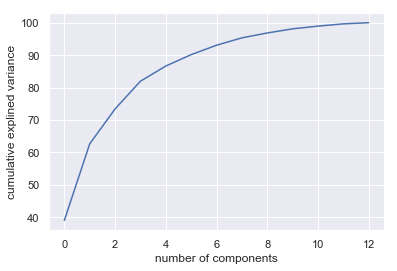

In [32]:
#plotting the data
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("number of components")
plt.ylabel('cumulative explined variance');